In [136]:
#sequence prediction using rnn
#coding with rnn using python
#step 0 Data preparation
# (number_of_records * length_of_Sequences * types_of_sequences) here type sequences are 1 we have only one type sequence that is sine sequnce
#(number _of_records * types_of_sequences) # where tyep sequence is 1


In [137]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [138]:
import math
import numpy

In [139]:
#to create sine wave from the data we will use thesine function from the pythons math library
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

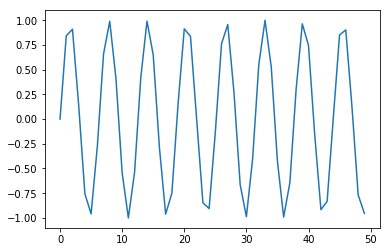

In [140]:
#visualising the sine wave what we have generated
plt.plot(sin_wave[:50])


In [141]:
#creating the data now
X = []
Y = []
seq_len = 50
num_records = len(sin_wave) - seq_len
for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
X = np.array(X)
X = np.expand_dims(X, axis=2)
Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)


In [142]:
#printing the shape of the data 
X.shape, Y.shape

((100, 50, 1), (100, 1))

In [143]:
#we looped for (num_records – 50) because 
#we want to set aside 50 records as our validation data. We can create this validation data now:
#creating the data now
X_val = []
Y_val = []
for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(sin_wave[i+seq_len])
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)
Y_val = np.array(Y_val)
Y_val = np.expand_dims(Y_val, axis=1)



In [144]:
#creating the architecture for our rnn model
learning_rate = 0.0001   # The amount that the weights are updated during training is referred to as the step size or the “learning rate.
nepoch = 25 #no idea - means that each sample in the training dataset has had an opportunity to update the internal model parameters,
#or else when an ENTIRE dataset is passed forward and backward through the neural network only ONCE
T = 50 #length of the sequence
hidden_dim = 100
output_dim = 1
bptt_truncate = 5 # Backpropagation through time (BPTT) is a gradient-based technique for training certain types of recurrent neural networks
min_clip_value = -10 #clipping is forcing the values to certain range that can be min or max
max_clip_value = 10


In [145]:
#Defining the weight of the network

In [146]:
U = np.random.uniform(0, 1, (hidden_dim,T)) # weight matrix for weights between input and hidden layers
W = np.random.uniform(0, 1, (hidden_dim,hidden_dim)) #weight matrix for weights between hidden and output layers
V = np.random.uniform(0, 1, (output_dim,hidden_dim)) #weight matrix for shared weights in the RNN layer (hidden layer)

In [147]:
#defining the activation function sigmoid used in the hidden layer
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [148]:
#Check the loss on training data -  forward pass through our RNN model and calculate 
#the squared error for the predictions for all records in order to get the loss value.
for epoch in range(nepoch):
    # check loss on train
    loss = 0.0
    
    # do a forward pass to get prediction
    for i in range(Y.shape[0]):
        x, y = X[i], Y[i]                    # get input, output values of each record
        prev_s = np.zeros((hidden_dim, 1))   # here, prev-s is the value of the previous activation of hidden layer; which is initialized as all zeroes
        for t in range(T):
            new_input = np.zeros(x.shape)    # we then do a forward pass for every timestep in the sequence
            new_input[t] = x[t]              # for this, we define a single input for that timestep
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)# to give logistic neurons real-valued output that is a smooth and bounded function of their total input. 
#It also has the added benefit of having nice derivatives which make learning the weights of a neural network easier
            mulv = np.dot(V, s)
            prev_s = s

    # calculate error 
        loss_per_record = (y - mulv)**2 / 2
        loss += loss_per_record
    loss = loss / float(y.shape[0])

In [149]:
# check loss on val
    val_loss = 0.0
    for i in range(Y_val.shape[0]):
        x, y = X_val[i], Y_val[i]
        prev_s = np.zeros((hidden_dim, 1))
        for t in range(T):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            mulu = np.dot(U, new_input)
            mulw = np.dot(W, prev_s)
            add = mulw + mulu
            s = sigmoid(add)
            mulv = np.dot(V, s)
            prev_s = s

        loss_per_record = (y - mulv)**2 / 2
        val_loss += loss_per_record
    val_loss = val_loss / float(y.shape[0])

    print('Epoch: ', epoch + 1, ', Loss: ', loss, ', Val Loss: ', val_loss)

Epoch:  25 , Loss:  [[132369.2277606]] , Val Loss:  [[66182.58960284]]


In [150]:
#starting the actual training by forward pass and backward pass
#In the forward pass:

#We first multiply the input with the weights between input and hidden layers
#Add this with the multiplication of weights in the RNN layer. 
#This is because we want to capture the knowledge of the previous timestep
#Pass it through a sigmoid activation function
#Multiply this with the weights between hidden and output layers
#At the output layer, we have a linear activation of the values so we do not explicitly pass the value through an activation layer
#Save the state at the current layer and also the state at the previous timestep in a dictionary


In [151]:
#code for forward pass
#train model
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    layers = []
    prev_s = np.zeros((hidden_dim, 1))
    dU = np.zeros(U.shape)
    dV = np.zeros(V.shape)
    dW = np.zeros(W.shape)
    
    dU_t = np.zeros(U.shape)
    dV_t = np.zeros(V.shape)
    dW_t = np.zeros(W.shape)
    
    dU_i = np.zeros(U.shape)
    dW_i = np.zeros(W.shape)
    
    #forward pass
    for t in range(T):
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        mulu = np.dot(U, new_input)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V, s)
        layers.append({'s':s, 'prev_s':prev_s})
        prev_s = s

In [152]:
#Backpropagate Error
#After the forward propagation step, we calculate the gradients at each layer, and backpropagate the errors.
#We will use truncated back propagation through time (TBPTT), instead of vanilla backprop.
#It may sound complex but its actually pretty straight forward.
#The core difference in BPTT versus backprop is that the backpropagation step is done for all the time steps in the RNN layer. 
#So if our sequence length is 50, we will backpropagate for all the timesteps previous to the current timestep.
#If you have guessed correctly, BPTT seems very computationally expensive. 
#So instead of backpropagating through all previous timestep , we backpropagate till x timesteps to save computational power. 
#Consider this ideologically similar to stochastic gradient descent, where we include a batch of data points instead of all the data points.

In [153]:
#backpropagating the errors
dmulv = (mulv - y)
#backward pass
for t in range(T):
    dV_t = np.dot(dmulv, np.transpose(layers[t]['s']))
    dsv = np.dot(np.transpose(V), dmulv)
    ds = dsv
    dadd = add * (1-add) * ds
    dmulw = dadd * np.ones_like(mulw)
    dprev_s = np.dot(np.transpose(W), dmulw)
    for i in range(t-1, max(-1, t-bptt_truncate-1), -1):
        ds = dsv + dprev_s
        dadd = add * (1- add) * ds
        dmulw = dadd * np.ones_like(mulw)
        dmulu = dadd * np.ones_like(mulu)
        dW_i = np.dot(W, layers[t]['prev_s'])
        dprev_s = np.dot(np.transpose(W), dmulw)
        new_input = np.zeros(x.shape)
        new_input[t] = x[t]
        dU_i = np.dot(U, new_input)
        dx = np.dot(np.transpose(U), dmulu)
        dU_t += dU_i
        dW_t += dW_i
    dV += dV_t
    dU += dU_t
    dW += dW_t
    
        

        

In [154]:
#update the weights  with the gradients of weights calculated. One thing we have to keep in mind that the gradients tend to explode if you don’t keep them in check.
#This is a fundamental issue in training neural networks,called the exploding gradient problem. So we have to clamp them in a range 
#so that they dont explode. We can do it like this
#CODE
if dU.max() > max_clip_value:
    dU[dU > max_clip_value] = max_clip_value
if dV.max() > max_clip_value:
    dV[dV > max_clip_value] = max_clip_value
if dW.max() > max_clip_value:
    dW[dW > max_clip_value] = max_clip_value
                
            
if dU.min() < min_clip_value:
    dU[dU < min_clip_value] = min_clip_value
if dV.min() < min_clip_value:
    dV[dV < min_clip_value] = min_clip_value
if dW.min() < min_clip_value:
    dW[dW < min_clip_value] = min_clip_value
 # update
U -= learning_rate * dU
V -= learning_rate * dV
W -= learning_rate * dW





Epoch:  1 , Loss:  [[101185.61756671]] , Val Loss:  [[50591.0340148]]
Epoch:  2 , Loss:  [[61205.46869629]] , Val Loss:  [[30601.34535365]]
Epoch:  3 , Loss:  [[31225.3198258]] , Val Loss:  [[15611.65669247]]
Epoch:  4 , Loss:  [[11245.17049551]] , Val Loss:  [[5621.96780111]]
Epoch:  5 , Loss:  [[1264.5157739]] , Val Loss:  [[632.02563908]]
Epoch:  6 , Loss:  [[20.15654115]] , Val Loss:  [[10.05477285]]
Epoch:  7 , Loss:  [[17.13622839]] , Val Loss:  [[8.55190426]]
Epoch:  8 , Loss:  [[17.38870495]] , Val Loss:  [[8.68196484]]
Epoch:  9 , Loss:  [[17.181681]] , Val Loss:  [[8.57837827]]
Epoch:  10 , Loss:  [[17.31275313]] , Val Loss:  [[8.64199652]]
Epoch:  11 , Loss:  [[17.12960034]] , Val Loss:  [[8.54768294]]
Epoch:  12 , Loss:  [[17.09020065]] , Val Loss:  [[8.52993502]]
Epoch:  13 , Loss:  [[17.17370113]] , Val Loss:  [[8.57517454]]
Epoch:  14 , Loss:  [[17.04906914]] , Val Loss:  [[8.50658127]]
Epoch:  15 , Loss:  [[16.96420184]] , Val Loss:  [[8.46794248]]
Epoch:  16 , Loss:  [[17.017519]] , Val Loss:  [[8.49241316]]
Epoch:  17 , Loss:  [[16.94199493]] , Val Loss:  [[8.45748739]]
Epoch:  18 , Loss:  [[16.99796892]] , Val Loss:  [[8.48242177]]
Epoch:  19 , Loss:  [[17.24817035]] , Val Loss:  [[8.6126231]]
Epoch:  20 , Loss:  [[17.00844599]] , Val Loss:  [[8.48682234]]
Epoch:  21 , Loss:  [[17.03943262]] , Val Loss:  [[8.50437328]]
Epoch:  22 , Loss:  [[17.01417255]] , Val Loss:  [[8.49409597]]
Epoch:  23 , Loss:  [[17.20918888]] , Val Loss:  [[8.5854792]]
Epoch:  24 , Loss:  [[16.92068017]] , Val Loss:  [[8.44794633]]
Epoch:  25 , Loss:  [[16.76856238]] , Val Loss:  [[8.37295808]]

In [155]:
#getting the predictions
preds = []
for i in range (Y.shape[0]):
    x, y = X[i], Y[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V,s)
        prev_s = s
    preds.append(mulv)
preds = np.array(preds)
        
    

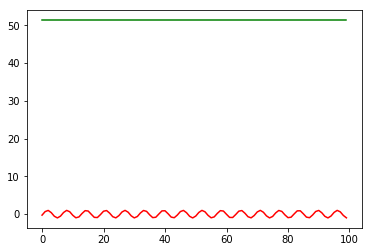

In [156]:
plt.plot(preds[:,0,0], 'g')
plt.plot(Y[:, 0], 'r')
plt.show()

In [157]:
#validation on the set
preds = []
for i in range (Y_val.shape[0]):
    x, y = X_val[i], Y_val[i]
    prev_s = np.zeros((hidden_dim, 1))
    # Forward pass
    for t in range(T):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_s)
        add = mulw + mulu
        s = sigmoid(add)
        mulv = np.dot(V,s)
        prev_s = s
    preds.append(mulv)
preds = np.array(preds)
        


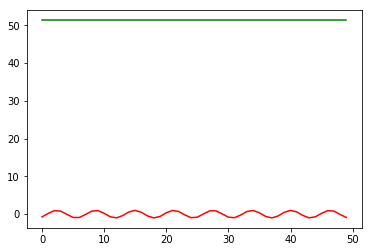

In [158]:
#plotting the graph
plt.plot(preds[:,0,0], 'g')
plt.plot(Y_val[:, 0], 'r')
plt.show()

In [1]:
# #the rmse score:
# from sklearn.metrics import mean_squared_error
# math.sqrt(mean_squared_error(Y_val[:,0] * max_val, preds[:, 0,0] * max_val))